### DRUG CLASSIFICATION 
The goal of this activity is to predict the Cholesterol based on sex, BP and Drug, In this activity I will Identify the best model to use in this prediction
* 1. DATA EXPLORATION

In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [2]:
df = pd.read_csv('drug.csv');

In [3]:
df.head(1000)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### I will check the unique values of each column

In [4]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [5]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [6]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

### Count the unique values in each feature 

In [7]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [8]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [9]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [10]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### Visualization for the count of cholesterol unique values 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


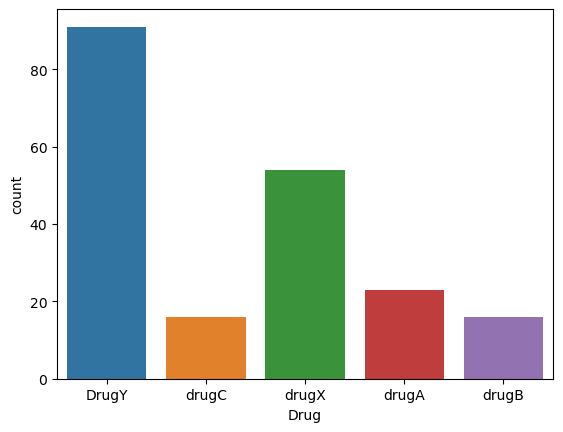

In [11]:
sns.countplot(df['Drug']);

### 2. Data Pre-Processing

I will just Drop some features to have a more clean data

In [12]:
df = df.drop(['Na_to_K'], axis=1)

In [13]:
df

,Age,Sex,BP,Cholesterol,Drug
0,23,F,HIGH,HIGH,DrugY
1,47,M,LOW,HIGH,drugC
2,47,M,LOW,HIGH,drugC
3,28,F,NORMAL,HIGH,drugX
4,61,F,LOW,HIGH,DrugY
...,...,...,...,...,...
195,56,F,LOW,HIGH,drugC
196,16,M,LOW,HIGH,drugC
197,52,M,NORMAL,HIGH,drugX
198,23,M,NORMAL,NORMAL,drugX


* 2.1 Data Cleaning 
* 2.1.1 Drop Duplicates

In [14]:
#check the shape of the dataframe 
df.shape

(200, 5)

In [15]:
#Check if there are duplicates
df.duplicated().sum()

12

In [16]:
#drop the duplicated values
df.drop_duplicates(inplace = True)

In [17]:
df.duplicated().sum()

0

In [18]:
#Check null values

df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Drug           0
dtype: int64

### As we can see, there are no null values in the dataset

In [19]:
#check data types of features
df.dtypes

Age             int64
Sex            object
BP             object
Cholesterol    object
Drug           object
dtype: object

In [20]:
# I just drop the age as it is not included in the one-hot encoding
df = df.drop(['Age'], axis=1)

### Since we do not have any numerical features, we will skip "removing extreme values" step

* 2.2 Converting Categorical Features into numerical features

In [21]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

In [22]:
df.columns

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [23]:
df2 = df.copy()
df2 

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY
5,F,NORMAL,HIGH,drugX
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


In [24]:
encoder = LabelEncoder();
df3 = df2.copy();

In [25]:
#loop
for col in df3.columns:
        if(col != 'Cholesterol'):
            df3[col] = encoder.fit_transform(df3[col]);

In [26]:
df3.head(10)

,Sex,BP,Cholesterol,Drug
0,0,0,HIGH,0
1,1,1,HIGH,3
3,0,2,HIGH,4
4,0,1,HIGH,0
5,0,2,HIGH,4
6,0,2,HIGH,0
7,1,1,HIGH,3
8,1,2,HIGH,0
9,1,1,NORMAL,0
10,0,1,HIGH,3


In [27]:
df3['Cholesterol'] = np.where(df3['Cholesterol'] == 'HIGH', 1,0)

In [28]:
df3

,Sex,BP,Cholesterol,Drug
0,0,0,1,0
1,1,1,1,3
3,0,2,1,4
4,0,1,1,0
5,0,2,1,4
...,...,...,...,...
195,0,1,1,3
196,1,1,1,3
197,1,2,1,4
198,1,2,0,4


In [29]:
df3.dtypes

Sex            int32
BP             int32
Cholesterol    int32
Drug           int32
dtype: object

### The features are now in integer values

### We will now select our feature, but lets first check the correlations
* 2.3 Feature Selection

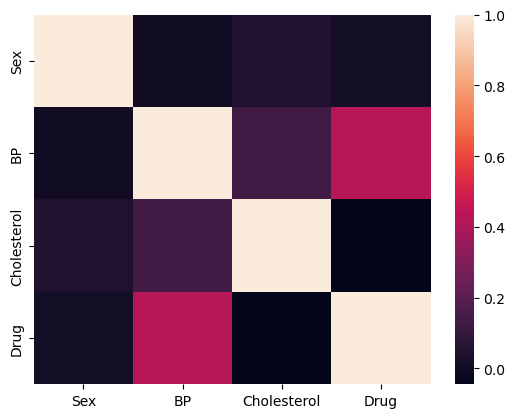

In [30]:
sns.heatmap(df3.corr());

### There are no correlated features in our dataset

# 3. Data Modelling
* 3.1 Split Target variables to feature variables

In [31]:
#Cholesterol is the traget var since this is a 0 and 1 values, we can classify this feature
X = df3.drop(['Drug'], axis=1);
y = df3['Drug'];

* 3.2 Split the dataset to training and tests

In [32]:
#importing model selection for training and test
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=.60, stratify=y);
#stratify - I use stratify so that the features have the same proportion. 

In [34]:
#see values of train and test
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(188, 3)
(112, 3)
(76, 3)


### 3.3 Choose The Best Model 
* 3.3.1 Naive Bayes

In [35]:
#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

In [36]:
#for evaluation

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report # so that we will not compute the accuracy

In [37]:
def evaluate_model(model):
    print('Classification Report\n',classification_report(y_test, model.predict(X_test), target_names=['DrugY','drugC', 'drugX', 'drugA', 'drugB']));
    print('Confusion Matrix \n',confusion_matrix(y_test, model.predict(X_test), labels=[0,1]));
    print('\nTraining Accuracy Score: ', model.score(X_train, y_train))
    print('Test Accuracy Score: ', model.score(X_test, y_test))
    print('\n ROC Curve')
    plot_roc_curve(model,X_test,y_test);

In [38]:
gnb = GaussianNB()
gnb.fit(X_train, y_train);
gnb.score(X_test, y_test)

0.35526315789473684

In [39]:
evaluate_model(gnb)

Classification Report
               precision    recall  f1-score   support

       DrugY       0.33      0.11      0.17        36
       drugC       0.19      0.50      0.28         8
       drugX       0.14      0.17      0.15         6
       drugA       0.46      1.00      0.63         6
       drugB       0.52      0.60      0.56        20

    accuracy                           0.36        76
   macro avg       0.33      0.48      0.36        76
weighted avg       0.36      0.36      0.32        76

Confusion Matrix 
 [[ 4 12]
 [ 0  4]]

Training Accuracy Score:  0.49107142857142855
Test Accuracy Score:  0.35526315789473684

 ROC Curve


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: Expected 'estimator' to be a binary classifier, but got GaussianNB fit on multiclass (5 classes) data

* 3.3.2 Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train);
bnb.score(X_test, y_test)

In [ ]:
evaluate_model(bnb)

* 3.3.3 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train);
dt.score(X_test, y_test)

In [ ]:
evaluate_model(dt)

* 3.3.4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train);
rf.score(X_test, y_test)

In [ ]:
evaluate_model(rf)

* 3.3.5 K-Nearest Neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train);
knn.score(X_test, y_test)

In [ ]:
evaluate_model(knn)

* 3.3.5 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train);
lr.score(X_test, y_test)

In [ ]:
evaluate_model(lr)


### 4. Hyperparameter Tuning / Cross Validation
To tune our model into a better model

* 4.1.1 Decision Tree Classifier Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [5,10,15,20]
}

rsearch = RandomizedSearchCV(DecisionTreeClassifier(), params, n_iter = 15, cv = 10)
rsearch.fit(X_train, y_train)

In [ ]:
rsearch.best_params_

In [ ]:
dt_tuned = DecisionTreeClassifier(
        splitter ='random',
        max_depth = 5, 
        criterion = 'entropy'
)

In [ ]:
dt_tuned.fit(X_train, y_train)

In [ ]:
evaluate_model(dt_tuned)

* 4.4.2 Random Forest Classifier Hyperparameter Tuning

In [ ]:
rf.get_params()

In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [5,10,15,20,30,50,100],
    'max_depth': [5,10,15,20]
}

rsearch_rf = RandomizedSearchCV(RandomForestClassifier(), params, n_iter = 15, cv = 10)
rsearch_rf.fit(X_train, y_train)

In [ ]:
rsearch_rf.best_params_

In [ ]:
rf_tuned = RandomForestClassifier(
        n_estimators = 15,
        max_depth = 20, 
        criterion = 'entropy'
)

In [ ]:
rf_tuned.fit(X_train, y_train)

In [ ]:
evaluate_model(rf_tuned)

### 5. Choosing a model / conclusion
* Decision Tree Classifier is my model selection since it has the highest AUC which is 71% and a close value of training and test accuracy, which is 65% and 63%. I think that this is the the best model. 